In [2]:
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum

In [51]:
# Definitions:
x_limit = 5000
y_limit = 5000
start = [2500,2500]
current_position = start
space = np.zeros(shape = (x_limit, y_limit))

In [140]:
def initialize(space):
    start = [2500,2500]
    space = np.zeros(shape = (x_limit, y_limit))
    return start, space

In [53]:
def run_ant(space, current_position, num_times):
    current_direction = direction.NORTH
    ones = 0
    for _ in range(num_times):
        if space[current_position[0]][current_position[1]] == 1:
            space[current_position[0]][current_position[1]] = 0
            current_position, current_direction = get_next_coords(current_position, current_direction, next_direction.LEFT)
        elif space[current_position[0]][current_position[1]] == 0:
            ones = ones + 1
            space[current_position[0]][current_position[1]] = 1
            current_position, current_direction = get_next_coords(current_position, current_direction, next_direction.RIGHT)
    print(ones)
    return space

In [54]:
class direction(Enum):
    NORTH = "NORTH"
    SOUTH = "SOUTH"
    EAST = "EAST"
    WEST = "WEST"
class next_direction(Enum):
    LEFT = "LEFT"
    RIGHT = "RIGHT"

In [55]:
def get_next_coords(next_coords, current_direction, next_step):
    if current_direction == direction.NORTH:
        if next_step == next_direction.LEFT:
            next_coords[0] = next_coords[0]-1
            next_heading = direction.WEST
        else:
            next_coords[0] = next_coords[0]+1
            next_heading = direction.EAST
    elif current_direction == direction.SOUTH:
        if next_step == next_direction.LEFT:
            next_coords[0]+=1 
            next_heading = direction.EAST
        else:
            next_coords[0]-=1
            next_heading = direction.WEST
    elif current_direction == direction.EAST:
        if next_step == next_direction.LEFT:
            next_coords[1]+=1
            next_heading = direction.NORTH
        else:
            next_coords[1]-=1
            next_heading = direction.SOUTH
    elif current_direction == direction.WEST:
        if next_step == next_direction.LEFT:
            next_coords[1]-=1
            next_heading = direction.SOUTH
        else:
            next_coords[1]+=1
            next_heading = direction.NORTH
    return next_coords, next_heading

In [57]:
start, space = initialize(space)
current_position = start
print(start, current_position)
space = run_ant(space, current_position, 50000)

[2500, 2500] [2500, 2500]
27667


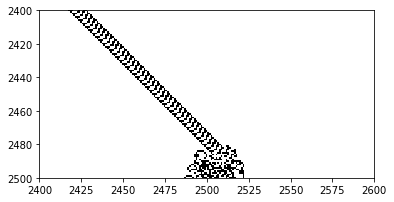

In [65]:
plt.imshow(space, cmap='Greys', interpolation='nearest')
plt.axis([2400,2600,2500,2400])
plt.show()

In [157]:
def run_ant_with_addition(space, current_position, num_times):
    current_direction = direction.NORTH
    ones = 0
    for _ in range(num_times):
        if space[current_position[0]][current_position[1]]%2 == 1:
            current_position, current_direction = get_next_coords(current_position, current_direction, next_direction.LEFT)
        elif space[current_position[0]][current_position[1]]%2 == 0:
            current_position, current_direction = get_next_coords(current_position, current_direction, next_direction.RIGHT)
        space[current_position[0]][current_position[1]] += 1
    return space

In [158]:
start, space = initialize(space)
current_position = start
print(start, current_position)
space = run_ant_with_addition(space, current_position, 90000)

[2500, 2500] [2500, 2500]


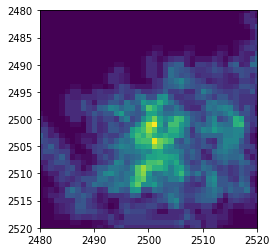

In [159]:
plt.imshow(space, interpolation='nearest')
plt.axis([2480,2520,2520,2480])
plt.show()

In [160]:
def multiple_ants(space, current_position, num_times):
    current_direction = direction.NORTH
    ones = 0
    for _ in range(num_times):
        for ant in current_position:
            if space[ant[0]][ant[1]]%2 == 1:
                space[ant[0]][ant[1]] = 0
                ant, current_direction = get_next_coords(ant, current_direction, next_direction.LEFT)
            elif space[ant[0]][ant[1]]%2 == 0:
                space[ant[0]][ant[1]] = 1
                ant, current_direction = get_next_coords(ant, current_direction, next_direction.RIGHT)
    return space

In [179]:
start, space = initialize(space)
print(start)
current_position = [[2600, 2600], start, start]
space = multiple_ants(space, current_position, 5000000)

[2500, 2500]


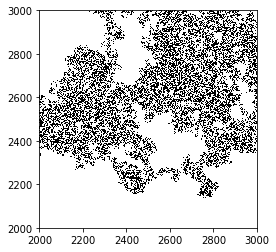

In [183]:
plt.imshow(space,cmap='Greys', interpolation='nearest')
plt.axis([2000, 3000, 2000, 3000])
plt.show()